In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
from sklearn_pandas import CategoricalImputer
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Check list**

**Rows and columns:** (311,130)

**Variable Type: ** 

**Variable qualitative:**  Organization_1 à  Organization_6
                           headline
                           fullname
                           location_name
                           current_company_position
                           current_company
                           education_1 à education_3

**Variable quantitative:** organization_start_1 à organization_start_6
                           organization_end_1   à organization_end_1

**Analysis of missing values:** we have a lot of missing values:
               we have almost half of the variables >85% NAN



**Data shape analysis**

In [65]:
pd.set_option('display.max_row',130)

In [66]:
!python generate_ProjetDS.py --image_dir=CrowdHumanTrain --csv_input=DataBase.csv --output_path=ch_train.record --label "head"

python3: can't open file 'generate_ProjetDS.py': [Errno 2] No such file or directory


In [67]:
import io
from google.colab import files
data=files.upload()
df=pd.read_csv(io.BytesIO(data['DataBase.csv']),sep=';',error_bad_lines=False,encoding='latin1')

Saving DataBase.csv to DataBase (1).csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [68]:
#url = 'https://raw.githubusercontent.com/OmarHeni/VIPartum/master/EspritDataStudentDB.csv'
#df = pd.read_csv(url,sep = ';')

#df=pd.read_csv('../DataBase.csv',sep=';',error_bad_lines=False,encoding='latin1')


In [69]:
df.shape


(608, 130)

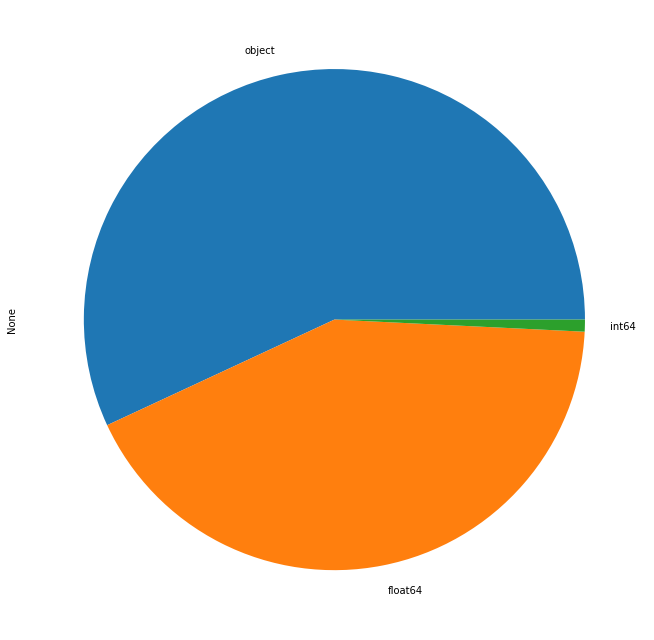

In [70]:
df.dtypes.value_counts().plot.pie()

In [71]:
df.head(5)

,member_id,profile_url,full_name,headline,location_name,summary,address,current_company,current_company_position,organization_1,...,language_proficiency_1,language_2,language_proficiency_2,language_3,language_proficiency_3,languages,skills,tags,note,mutual_count
0,550489359,https://www.linkedin.com/in/baycii/,Baycii Wassim Derbel,Computer Engineer & Data Scientist | Specializ...,"Ville de Paris, Ãle-de-France, France",Computer Engineer & Data Scientist | Specializ...,"Ville de Paris, Ãle-de-France, France",Kaisens Data,Data Scientist Intern,Kaisens Data,...,NaN,NaN,NaN,NaN,NaN,NaN,"Artificial Intelligence (AI) : 2,Web Solutions...",NaN,NaN,19.0
1,698923074,https://www.linkedin.com/in/ichrak-houidi-4560...,Ichrak Houidi,Data scientist intern at Keyrus,"Sousse, Tunisie",There is always more to learn about statistics...,"Sousse, Tunisie",Keyrus,Data scientist,Keyrus,...,NaN,NaN,NaN,NaN,NaN,NaN,"Python (langage de programmation) : 2,Deep lea...",NaN,NaN,13.0
2,595214386,https://www.linkedin.com/in/oussama-sassi-92a4...,Oussama Sassi,Data Scientist chez RUTILEA,"Ariana, Tunisie",Je suis Oussama Sassi actuellement Ã©tudiant e...,"Ariana, Tunisie","Rutilea, Inc.",Data Scientist,"Rutilea, Inc.",...,NaN,NaN,NaN,NaN,NaN,NaN,"R : null,MySQL : null,Java : null,NoSQL : null...",NaN,NaN,9.0
3,766616182,https://www.linkedin.com/in/skander-haddad-75a...,Skander Haddad,Data Scientist | Deeplearning.ai ambassador | ...,"Monastir, Tunisie",NaN,"Monastir, Tunisie",Enactus Esprit ICT,Alumni,Enactus Esprit ICT,...,Bilingue ou langue natale,English,CapacitÃ© professionnelle complÃ¨te,French,CapacitÃ© professionnelle complÃ¨te,"Arabic,English,French","JavaScript : 1,HTML : 1,Python : 1,MySQL : 1,J...",NaN,NaN,6.0
4,621761804,https://www.linkedin.com/in/kais-ben-youssef-a...,Kais Youssef,Data Scientist chez ENGIE,"Paris, Ãle-de-France, France",NaN,"Paris, Ãle-de-France, France",ENGIE,Data Scientist,ENGIE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


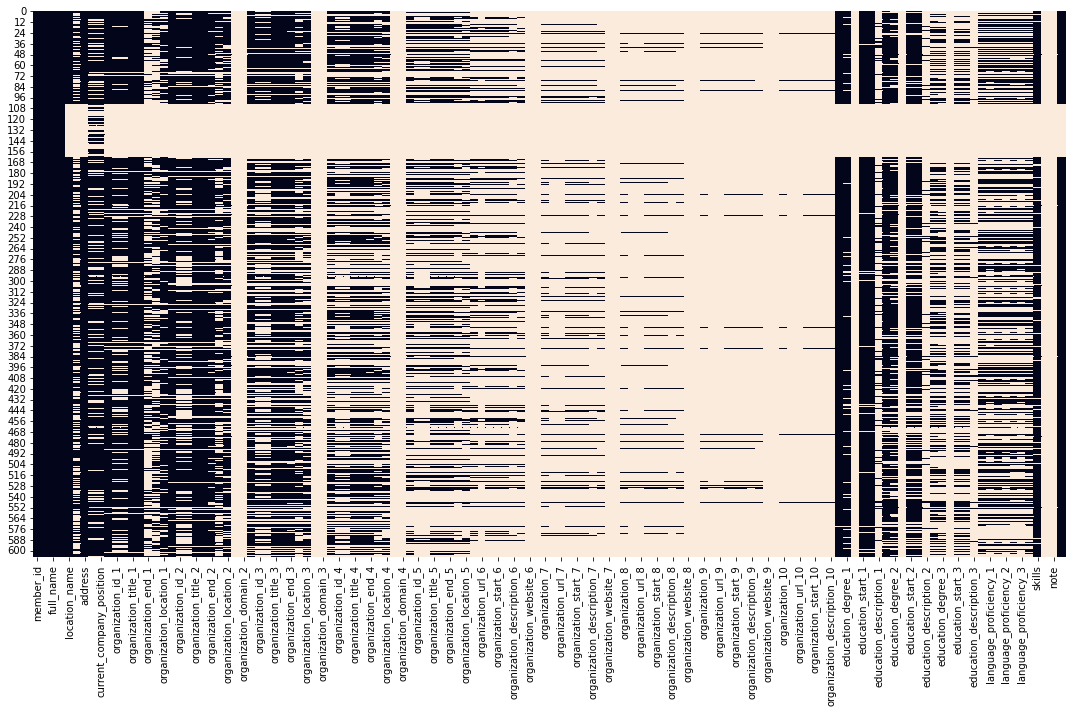

In [72]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isna(),cbar=False)

In [73]:
(df.isna().sum()/df.shape[0]).sort_values()

member_id                      0.000000
profile_url                    0.000000
full_name                      0.000000
headline                       0.000000
address                        0.097039
mutual_count                   0.097039
location_name                  0.097039
education_1                    0.098684
education_start_1              0.123355
education_end_1                0.123355
organization_1                 0.125000
organization_title_1           0.125000
organization_start_1           0.125000
skills                         0.154605
education_degree_1             0.162829
organization_2                 0.179276
organization_start_2           0.179276
organization_title_2           0.179276
organization_end_2             0.226974
education_2                    0.228618
current_company                0.238487
current_company_position       0.238487
education_start_2              0.286184
education_end_2                0.286184
organization_location_1        0.291118


We observe that:
member_id,profile_url,full_name,headline columns have no missing values


**Fund Analysis**



 **Elimination of unnecessary columns**

In [74]:
#prendre les columnes dont les valeurs manquantes moins de 85% 
df=df[df.columns[df.isna().sum()/df.shape[0] <0.85]]

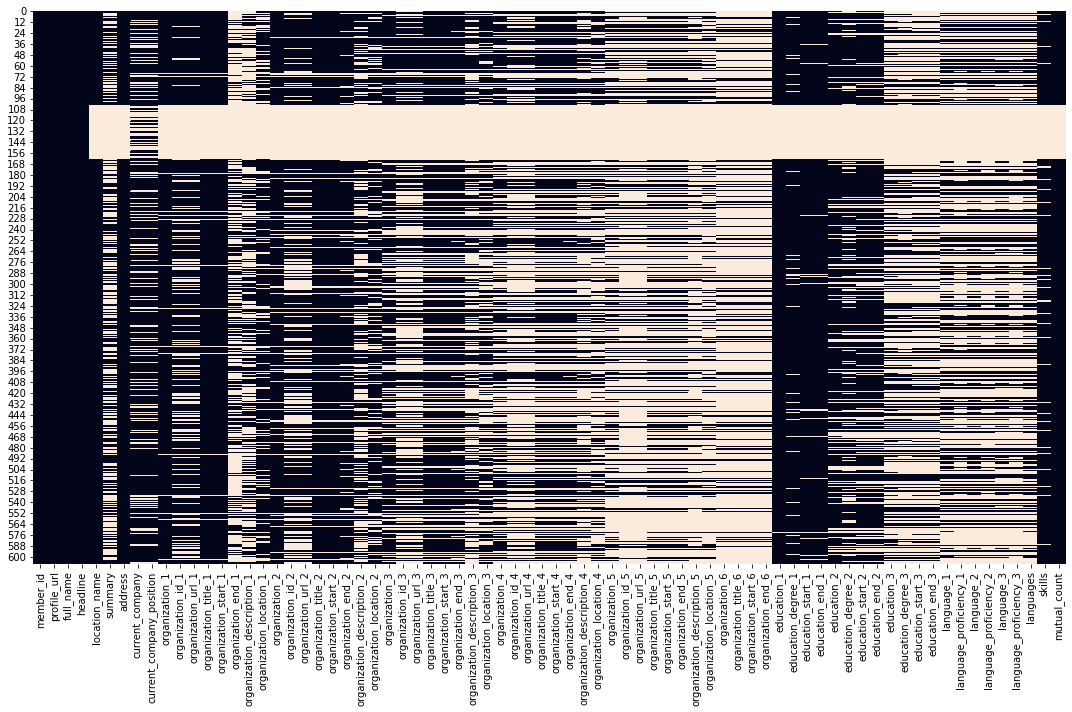

In [75]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isna(),cbar=False)

In [76]:
df.shape

(608, 74)

In [77]:
df.columns

Index(['member_id', 'profile_url', 'full_name', 'headline', 'location_name',
       'summary', 'address', 'current_company', 'current_company_position',
       'organization_1', 'organization_id_1', 'organization_url_1',
       'organization_title_1', 'organization_start_1', 'organization_end_1',
       'organization_description_1', 'organization_location_1',
       'organization_2', 'organization_id_2', 'organization_url_2',
       'organization_title_2', 'organization_start_2', 'organization_end_2',
       'organization_description_2', 'organization_location_2',
       'organization_3', 'organization_id_3', 'organization_url_3',
       'organization_title_3', 'organization_start_3', 'organization_end_3',
       'organization_description_3', 'organization_location_3',
       'organization_4', 'organization_id_4', 'organization_url_4',
       'organization_title_4', 'organization_start_4', 'organization_end_4',
       'organization_description_4', 'organization_location_4',
       'org

In [78]:
df=df.drop(['organization_id_1','organization_id_2','organization_id_3','organization_id_4','organization_id_5'],axis=1)

In [79]:

df=df.drop(['language_1','language_proficiency_1','language_2','language_proficiency_2','language_3','language_proficiency_3','languages'],axis=1)

In [80]:

df =df.drop(['education_start_1','education_start_2','education_start_3'],axis=1)

In [81]:
df =df.drop(['education_end_1','education_end_2','education_end_3'],axis=1)

In [82]:
df =df.drop(['member_id','summary','mutual_count'],axis=1)

In [83]:
#df =df.drop(df.index[102:162],inplace=True)

# index_with_nan = df.index[df.isnull().any(axis=1)]
# df.drop(index_with_nan,0, inplace=True)

In [84]:
df.shape


(608, 53)

**Histogrammes des variables continues**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see th

<Figure size 2160x648 with 0 Axes>

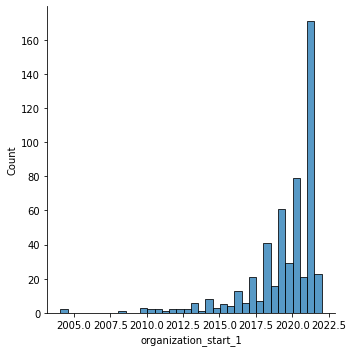

<Figure size 2160x648 with 0 Axes>

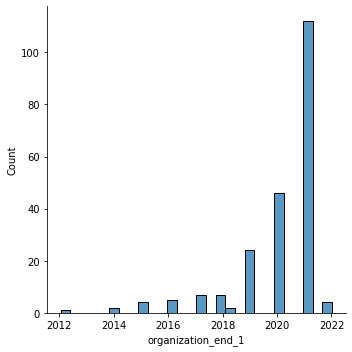

<Figure size 2160x648 with 0 Axes>

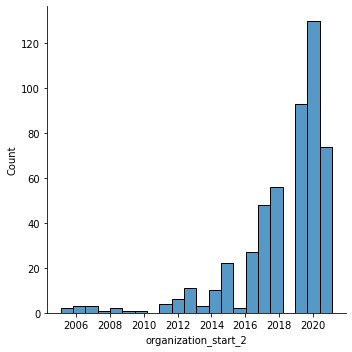

<Figure size 2160x648 with 0 Axes>

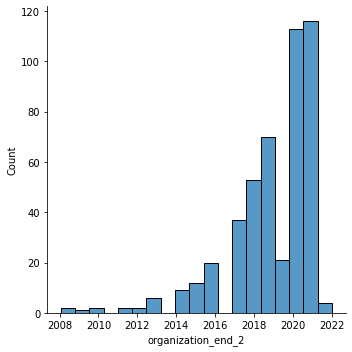

<Figure size 2160x648 with 0 Axes>

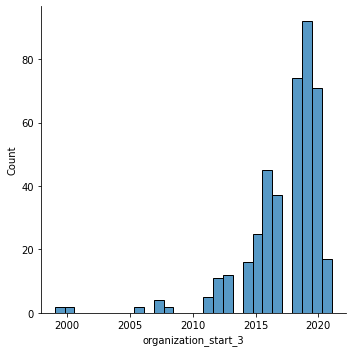

<Figure size 2160x648 with 0 Axes>

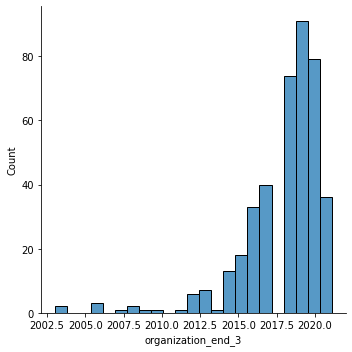

<Figure size 2160x648 with 0 Axes>

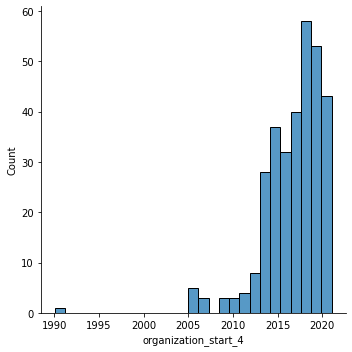

<Figure size 2160x648 with 0 Axes>

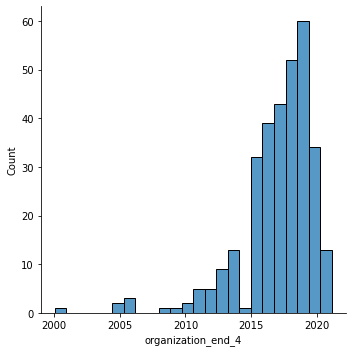

<Figure size 2160x648 with 0 Axes>

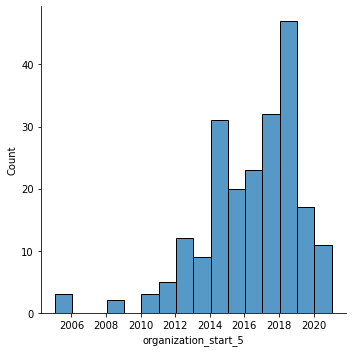

<Figure size 2160x648 with 0 Axes>

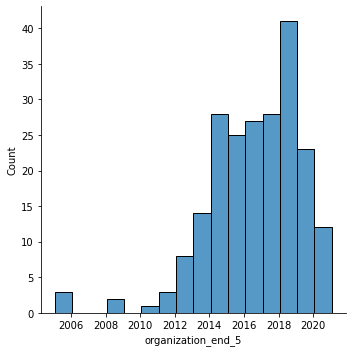

<Figure size 2160x648 with 0 Axes>

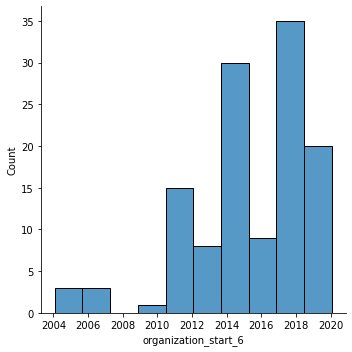

<Figure size 2160x648 with 0 Axes>

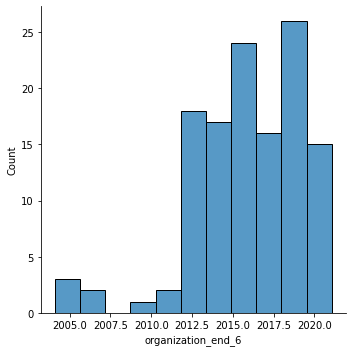

In [85]:
for col in df.select_dtypes('float'):
  plt.figure()
  sns.displot(df[col])


**Varaibles Quanlitatives**

**Organisation**

In [86]:
orgs = ['organization_1','organization_2','organization_3','organization_4','organization_5','organization_6']
final_count = Counter()
for org in orgs:
  final_count = final_count + Counter(df.groupby([org]).size().to_dict())
print(final_count)

Counter({'Tunisie TÃ©lÃ©com': 51, 'Sagemcom': 34, "SociÃ©tÃ© Tunisienne de l'ElectricitÃ© et du Gaz (STEG)": 28, 'Sofrecom Tunisie': 28, "Ecole Nationale d'IngÃ©nieurs de Tunis": 26, "ENSI - Ecole Nationale des Sciences de l'Informatique": 17, 'ACTIA Engineering Services': 14, "ESPRIT (Ecole SupÃ©rieure PrivÃ©e d'IngÃ©nierie et de Technologies)": 14, 'Valeo': 14, 'WEVIOO': 13, 'BIAT': 12, 'SONEDE': 12, 'ODDO BHF': 11, 'Telnet': 11, "Ecole Nationale d'Ingenieurs de Tunis": 10, 'TUNICAST FOUNDRY': 10, "Ecole SupÃ©rieure PrivÃ©e d'IngÃ©nierie et de Technologies - ESPRIT": 9, 'Safran': 9, 'VERMEG for Banking & Insurance Software': 9, 'axefinance': 9, 'Cognira': 8, 'Ooredoo Tunisie': 8, 'Orange Tunisie': 8, 'SAGEMCOM': 8, 'SERS INGENIERIE': 8, 'Talan Tunisie': 8, 'Mitakus analytics': 8, 'ONAS': 8, 'ESPRIT': 8, '3S Standard Sharing Software': 7, 'EPAC Technologies': 7, 'ESI Group': 7, 'IT SERV': 7, 'STUDI International': 7, 'ENIT Junior Entreprise': 7, 'Altran': 6, 'ENSI Junior Entreprise': 

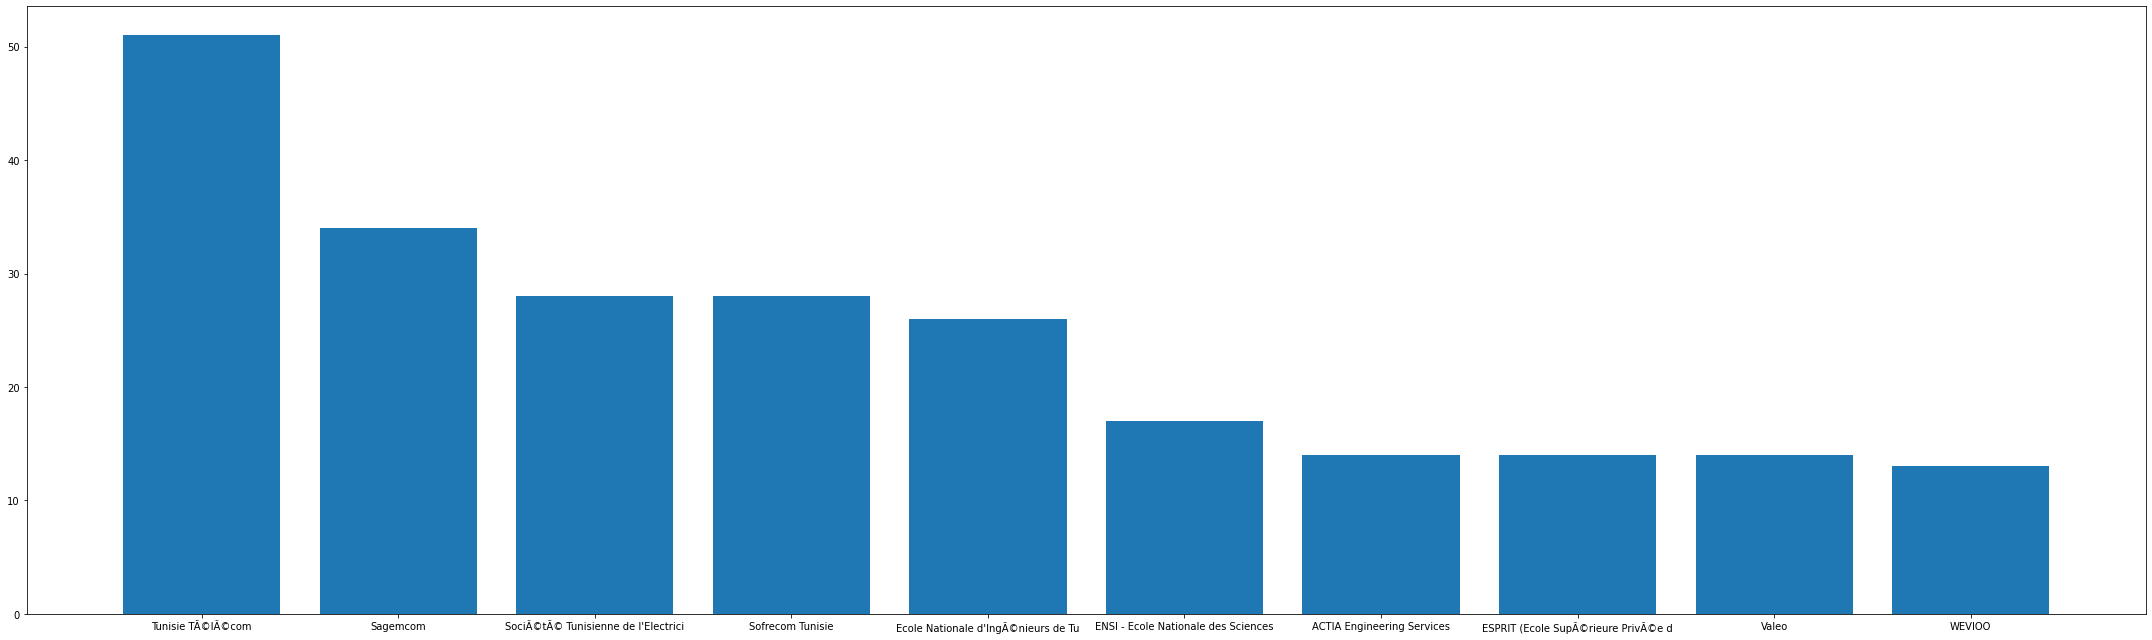

In [87]:
dictc = {}
plt.rcParams["figure.figsize"] = [30, 9]
plt.rcParams["figure.autolayout"] = True

for element , count in final_count.most_common(10):
  dictc[element[0:35]] = count
plt.bar(dictc.keys(), dictc.values())
plt.show()


**Organisation Location**

In [88]:
orgs = ['organization_location_1','organization_location_2','organization_location_3','organization_location_4','organization_location_5']

final_count = Counter()
for org in orgs:
  final_count = final_count + Counter(df.groupby([org]).size().to_dict())
print(final_count)

Counter({'Tunisie': 325, 'Tunis, Tunisie': 205, 'Gouvernorat deÂ\xa0Tunis, Tunisia': 141, 'Tunisia': 44, 'Gouvernorat deÂ\xa0lâ\x80\x99Ariana, Tunisia': 36, 'Tunis': 32, 'Tunis, Tunisia': 31, 'Ariana, Tunisie': 28, 'Sousse, Tunisie': 28, 'Ben Arous, Tunisie': 19, 'RÃ©gion de Paris, France': 19, 'Gouvernorat de la Manouba, Tunisia': 18, 'Gouvernorat deÂ\xa0Ben Arous, Tunisia': 18, 'Gouvernorat deÂ\xa0Monastir, Tunisia': 17, 'Gouvernorat deÂ\xa0Sousse, Tunisia': 14, 'Megrine, Ben Arous, Tunisie': 14, 'Ville de Paris, Ã\x8ele-de-France, France': 14, 'Gouvernorat deÂ\xa0Sfax, Tunisia': 13, 'Tunis Governorate, Tunisia': 12, 'Manouba, Tunisie': 11, 'Monastir, Tunisie': 11, 'tunis': 10, 'Gouvernorat deÂ\xa0GabÃ¨s, Tunisia': 7, 'Sfax, Tunisie': 7, 'Gouvernorat deÂ\xa0Kairouan, Tunisia': 6, 'Paris, Ã\x8ele-de-France, France': 6, 'Gouvernorat deÂ\xa0Bizerte, Tunisia': 6, 'Nabeul, Tunisie': 6, 'Sousse': 6, 'Ariana Governorate, Tunisia': 5, 'BÃ©ja, Tunisie': 5, 'Aix-en-Provence, Provence-Alpes-CÃ´

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


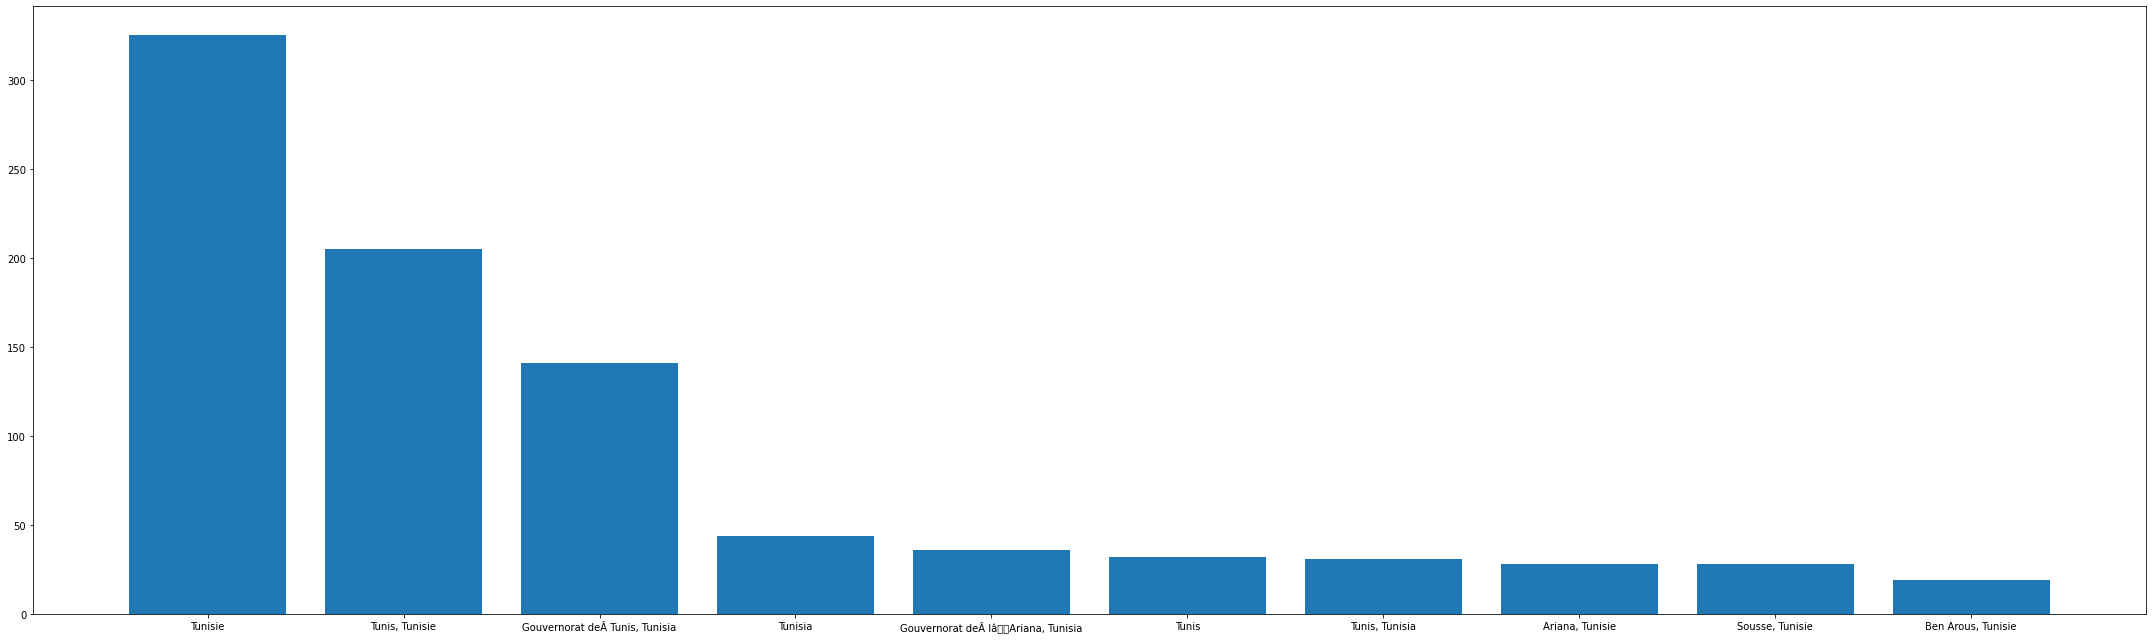

In [89]:
dictc = {}
plt.rcParams["figure.figsize"] = [30, 9]
plt.rcParams["figure.autolayout"] = True

for element , count in final_count.most_common(10):
  dictc[element[0:35]] = count
plt.bar(dictc.keys(), dictc.values())
plt.show()

**Education**

In [90]:
orgs = ['education_1','education_2','education_3']

final_count = Counter()
for org in orgs:
  final_count = final_count + Counter(df.groupby([org]).size().to_dict())
print(final_count)

Counter({"Ecole Nationale d'IngÃ©nieurs de Tunis": 303, "Ecole SupÃ©rieure PrivÃ©e d'IngÃ©nierie et de Technologies - ESPRIT": 99, "ENSI - Ecole Nationale des Sciences de l'Informatique": 78, "IPEIT - Institut PrÃ©paratoire aux Etudes d'IngÃ©nieurs de Tunis": 45, "Institut prÃ©paratoire aux Ã©tudes d'ingÃ©nieurs d'El Manar (IPEIEM)": 44, "IPEIN - Institut PrÃ©paratoire aux Ã\x89tudes d'IngÃ©nieur de Nabeul": 37, "SUP'COM": 29, "IPEIS - Institut PrÃ©paratoire aux Ã\x89tudes d'IngÃ©nieur de Sfax": 25, 'FacultÃ© des Sciences MathÃ©matiques, Physiques et Naturelles de Tunis': 11, 'ENIT': 9, "Institut PrÃ©paratoire aux Etudes d'IngÃ©nieurs de Monastir": 8, 'Le Mans UniversitÃ©': 7, 'Ecole Nationale dâ\x80\x99IngÃ©nieurs de Carthage ENICarthage': 7, 'Institut SupÃ©rieur des Etudes Technologiques en Communications de Tunis': 7, 'Institut du Risque et de lâ\x80\x99Assurance du Mans': 6, 'IPEIB': 6, 'Preparatory Institute for Engineering Studies of Monastir (IPEIM)': 6, 'ESSTHS - Ã\x89cole SupÃ

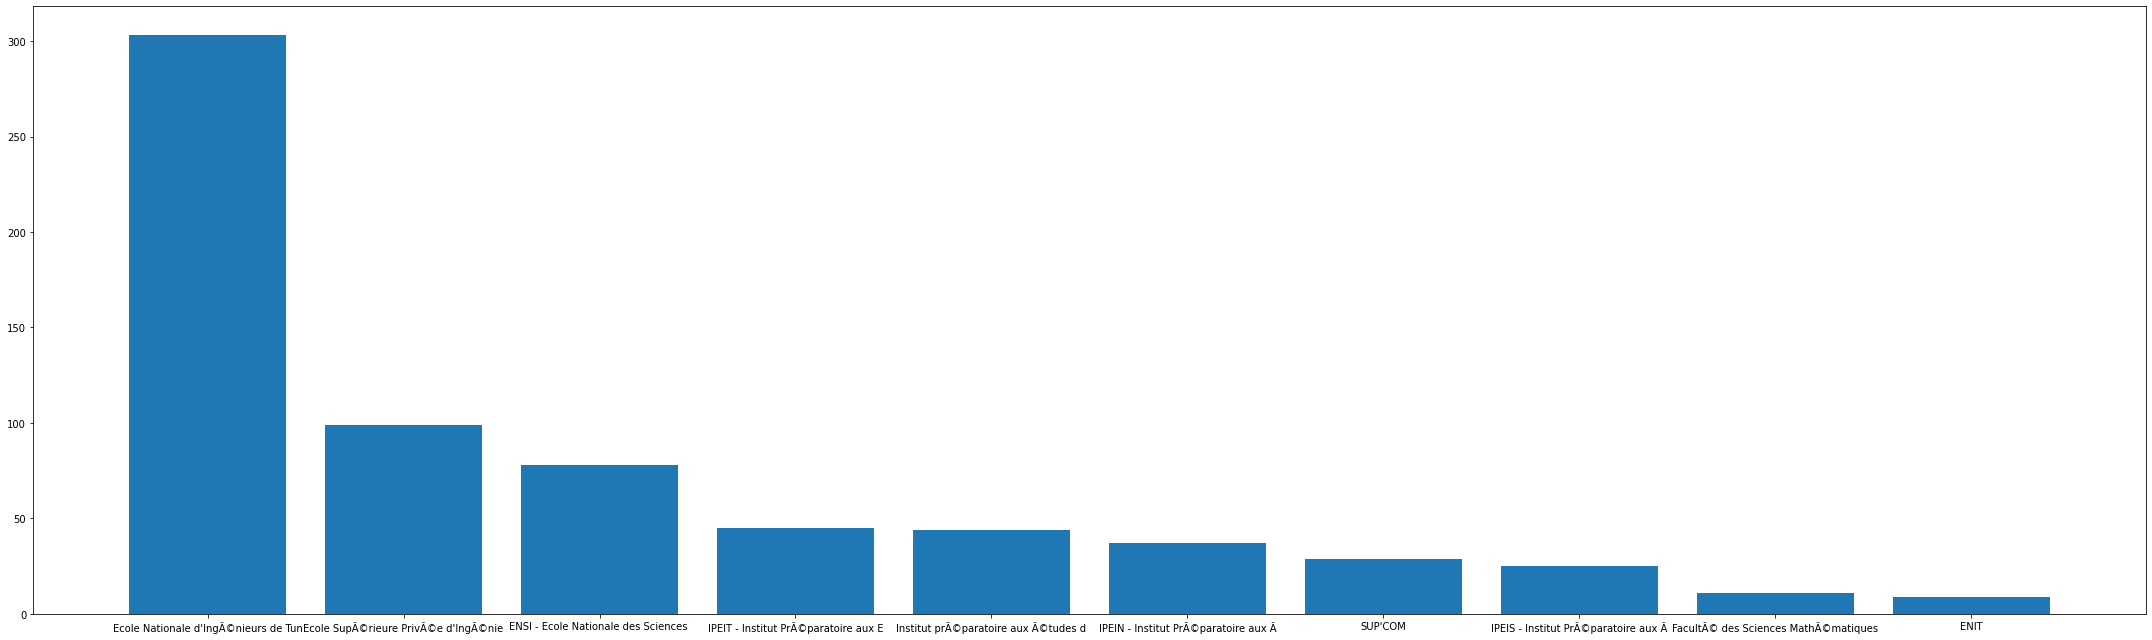

In [91]:
dictc = {}
plt.rcParams["figure.figsize"] = [30, 9]
plt.rcParams["figure.autolayout"] = True

for element , count in final_count.most_common(10):
  dictc[element[0:36]] = count
plt.bar(dictc.keys(), dictc.values())
plt.show()

**Current Company Position**




In [92]:
final_count = Counter(df.groupby((df['current_company_position'].str.lower())).size().to_dict())
final_count['élève ingénieur'] = final_count['élève ingénieur']+ final_count['elève ingénieur']
del final_count['elève ingénieur']
print(final_count)

Counter({'ingã©nieur': 49, 'data scientist': 40, 'ã\x89lã¨ve ingã©nieur': 20, 'elã¨ve ingã©nieur': 11, 'devops engineer': 9, 'ingã©nieur en gã©nie civil': 9, 'ingã©nieur dã©veloppement': 8, 'ingã©nieur gã©nie civil': 7, 'ingã©nieur informatique': 7, 'ingã©nieur civil': 6, 'ingã©nieur structure gã©nie civil': 6, 'software engineer': 5, 'ã©lã¨ve ingã©nieur': 5, 'data engineer': 4, 'enseignant': 4, 'ingã©nieur dã©veloppement embarquã©': 4, 'stagiaire': 4, 'chef de projet': 3, 'dã©veloppeur full stack': 3, 'full stack engineer': 3, 'ingã©nieur devops': 3, 'stage ingã©nieur': 3, '.net software engineer': 2, 'assistant chef de projet gc': 2, 'chargã© de projets': 2, 'chef de production adjoint en infrastructures linã©aires et amã©nagement urbain': 2, 'chef dâ\x80\x99ã©quipe production': 2, 'chef service equipements biomedicaux': 2, 'consultant data scientist': 2, 'consultant technique sap': 2, 'consultante en data science': 2, 'consultante expã©rimentã©e radio': 2, 'data science engineer': 2

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)


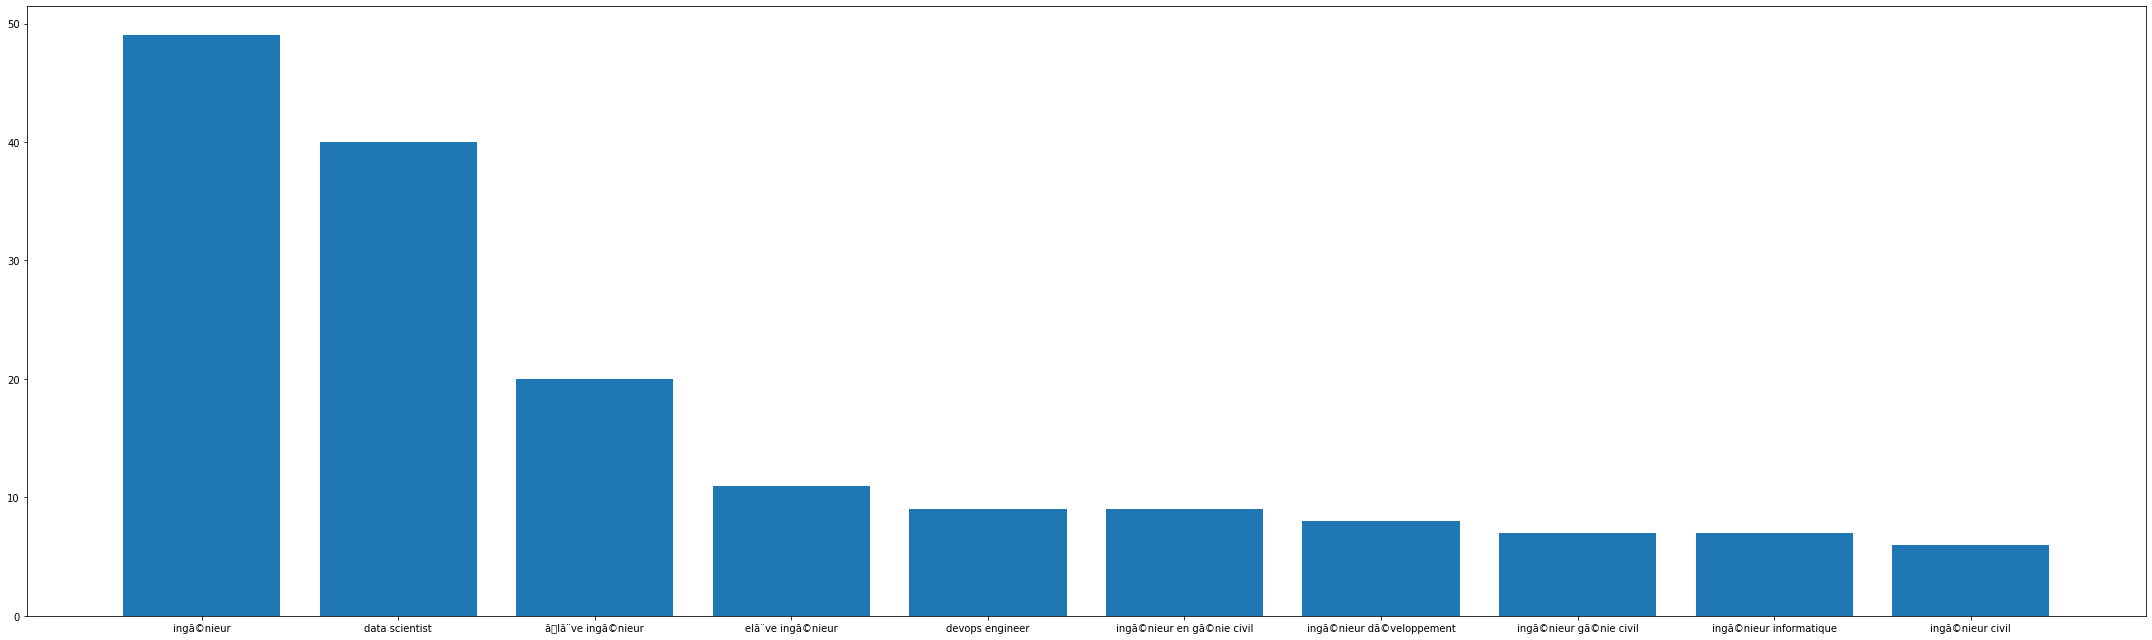

In [93]:
dictc = {}
plt.rcParams["figure.figsize"] = [30, 9]
plt.rcParams["figure.autolayout"] = True

for element , count in final_count.most_common(10):
  dictc[element[0:35]] = count
plt.bar(dictc.keys(), dictc.values())
plt.show()

**Location**

In [94]:
orgs = ['location_name']

final_count = Counter()
for org in orgs:
  final_count = final_count + Counter(df.groupby([org]).size().to_dict())
print(final_count)
location = {'Tunis': 0 , 'France':0}
for key,val in  final_count.items():
  for key_loc,val_loc in location.items():
    if key_loc in key:
      location[key_loc] = val_loc + val
print(location)

Counter({'Tunis, Tunisie': 205, 'Tunis, Tunis, Tunisie': 33, 'Ben Arous, Tunisie': 32, 'Tunisie': 22, 'Menzah, Tunis, Tunisie': 20, 'Bizerte, Tunisie': 15, 'Le Bardo, Tunisie': 12, 'Paris, Ã\x8ele-de-France, France': 12, 'Ben Arous, Ben Arous, Tunisie': 11, 'Soukra, Ariana, Tunisie': 11, 'Ariana, Tunisie': 8, 'Grand Tunis et pÃ©riphÃ©rie': 8, 'Manouba, Tunisie': 8, 'Monastir, Tunisie': 8, 'Nabeul, Tunisie': 8, 'Hammamet, Nabeul, Tunisie': 7, 'Megrine, Ben Arous, Tunisie': 7, 'Ariana, Tunis, Tunisie': 6, 'France': 6, 'Raoued, Ariana, Tunisie': 6, 'Sousse, Tunisie': 6, 'El Ouardia, Tunis, Tunisie': 5, 'Paris et pÃ©riphÃ©rie': 5, 'BÃ©ja, Tunisie': 4, 'El Omrane SupÃ©rieur, Tunis, Tunisie': 4, 'Sfax, Tunisie': 4, 'Bou Mhel El Bassatine, Ben Arous, Tunisie': 3, 'Carthage, Tunisie': 3, 'El Mourouj, Ben Arous, Tunisie': 3, 'Gafsa, Tunisie': 3, 'Kalaa Kebira, Sousse, Tunisie': 3, 'La Nouvelle Medina, Ben Arous, Tunisie': 3, 'Medenine, Tunisie': 3, 'Ariana MÃ©dina, Ariana, Tunisie': 2, 'Bab El 

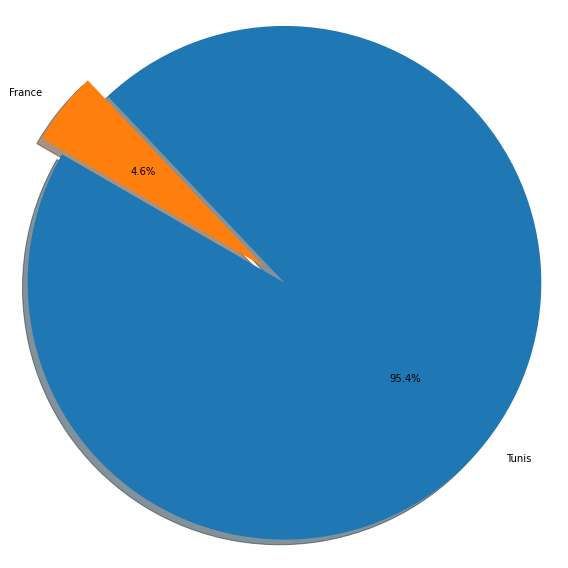

In [95]:
explode=[0,0.1]
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(location.values(), explode=explode,labels=location.keys(), autopct='%1.1f%%',
        shadow=True, startangle=150)
ax1.axis('equal')  
plt.show()

Skills

In [96]:
df['skills']

0      Artificial Intelligence (AI) : 2,Web Solutions...
1      Python (langage de programmation) : 2,Deep lea...
2      R : null,MySQL : null,Java : null,NoSQL : null...
3      JavaScript : 1,HTML : 1,Python : 1,MySQL : 1,J...
4                                                    NaN
                             ...                        
603    MATLAB : null,Python (langage de programmation...
604    AutoCAD : null,Revit : null,Robot structural a...
605    Microsoft Office : null,AutoCAD : null,epanet ...
606    IngÃ©nierie : null,Gestion de projet : null,Co...
607    Microsoft Office : null,Microsoft Word : null,...
Name: skills, Length: 608, dtype: object

In [97]:
df.skills = df.skills.str.replace('[1-9]','', regex = True)
df.skills = df.skills.str.replace('null','', regex = True)
df.skills = df.skills.str.replace(',','', regex = True)
df['skills']

0      Artificial Intelligence (AI) : Web Solutions :...
1      Python (langage de programmation) : Deep learn...
2      R : MySQL : Java : NoSQL : Hadoop : PHP : Symf...
3      JavaScript : HTML : Python : MySQL : Java : No...
4                                                    NaN
                             ...                        
603        MATLAB : Python (langage de programmation) : 
604    AutoCAD : Revit : Robot structural analysis Pr...
605    Microsoft Office : AutoCAD : epanet : swmm : S...
606    IngÃ©nierie : Gestion de projet : Communicatio...
607    Microsoft Office : Microsoft Word : Microsoft ...
Name: skills, Length: 608, dtype: object

**Duplicated Rows**

In [98]:
all_duplicates = df[df.duplicated()]
all_duplicates.value_counts()

Series([], dtype: int64)

**Categorical Missing Values**

**Organization**

**Organization_start Organization_end**

In [99]:
df[['organization_start_1','organization_start_2','organization_start_4','organization_start_5','organization_start_6']].isnull().sum()


organization_start_1     76
organization_start_2    109
organization_start_4    290
organization_start_5    393
organization_start_6    484
dtype: int64

In [100]:
df[['organization_end_1','organization_end_2','organization_end_4','organization_end_5','organization_end_6']].isnull().sum()


organization_end_1    394
organization_end_2    138
organization_end_4    292
organization_end_5    393
organization_end_6    484
dtype: int64

In [101]:
df[['organization_start_1','organization_start_2']] = df[['organization_start_1','organization_start_2']].fillna(df[['organization_start_1','organization_start_2']].max()) 
df[['organization_start_3','organization_start_4']] = df[['organization_start_3','organization_start_4']].fillna(df[['organization_start_3','organization_start_4']].max()) 
df[['organization_start_5','organization_start_6']] = df[['organization_start_5','organization_start_6']].fillna(df[['organization_start_5','organization_start_6']].max()) 

df[['organization_end_1','organization_end_2']] = df[['organization_end_1','organization_end_2']].fillna(value=df[['organization_end_1','organization_end_2']].max())
df[['organization_end_3','organization_end_4']] = df[['organization_end_3','organization_end_4']].fillna(value=df[['organization_end_3','organization_end_4']].max())
df[['organization_end_5','organization_end_6']] = df[['organization_end_5','organization_end_6']].fillna(value=df[['organization_end_5','organization_end_6']].max())



In [102]:
df[['organization_end_1','organization_end_2','organization_end_4','organization_end_5','organization_end_6']].isnull().sum()


organization_end_1    0
organization_end_2    0
organization_end_4    0
organization_end_5    0
organization_end_6    0
dtype: int64

In [103]:
df[['organization_start_1','organization_start_2','organization_start_4','organization_start_5','organization_start_6']].isnull().sum()


organization_start_1    0
organization_start_2    0
organization_start_4    0
organization_start_5    0
organization_start_6    0
dtype: int64

Organization

In [104]:
df[['organization_1','organization_2','organization_3','organization_4','organization_5','organization_6']].isnull().sum()


organization_1     76
organization_2    109
organization_3    191
organization_4    290
organization_5    393
organization_6    484
dtype: int64

In [105]:
imputer=CategoricalImputer()
df['organization_1']=np.array(df['organization_1'],dtype=object)
df['organization_1']=imputer.fit_transform(df['organization_1'])
df['organization_2']=np.array(df['organization_2'],dtype=object)
df['organization_2']=imputer.fit_transform(df['organization_2'])
df['organization_3']=df['organization_3'].fillna("Unknown")
df['organization_4']=imputer.fit_transform(df['organization_4'])
df['organization_4']=np.array(df['organization_4'],dtype=object)
df['organization_5']=imputer.fit_transform(df['organization_5'])
df['organization_5']=np.array(df['organization_5'],dtype=object)
df['organization_6']=imputer.fit_transform(df['organization_6'])
df['organization_6']=np.array(df['organization_6'],dtype=object)



In [106]:
df[['organization_1','organization_2','organization_3','organization_4','organization_5','organization_6']].isnull().sum()


organization_1    0
organization_2    0
organization_3    0
organization_4    0
organization_5    0
organization_6    0
dtype: int64

**Organization title**

In [107]:
imputer=CategoricalImputer()
df['organization_title_1']=np.array(df['organization_title_1'],dtype=object)
df['organization_title_1']=imputer.fit_transform(df['organization_title_1'])

df['organization_title_2']=np.array(df['organization_title_2'],dtype=object)
df['organization_title_2']=imputer.fit_transform(df['organization_title_2'])

df['organization_title_3']=np.array(df['organization_title_3'],dtype=object)
df['organization_title_3']=imputer.fit_transform(df['organization_title_3'])

df['organization_title_4']=np.array(df['organization_title_4'],dtype=object)
df['organization_title_4']=imputer.fit_transform(df['organization_title_4'])

df['organization_title_5']=np.array(df['organization_title_5'],dtype=object)
df['organization_title_5']=imputer.fit_transform(df['organization_title_5'])

df['organization_title_6']=np.array(df['organization_title_6'],dtype=object)
df['organization_title_6']=imputer.fit_transform(df['organization_title_6'])


**organization_description**

In [108]:


df['organization_description_1']=df['organization_description_1'].fillna("Unknown")

df['organization_description_2']=np.array(df['organization_description_2'],dtype=object)
df['organization_description_2']=imputer.fit_transform(df['organization_description_2'])

df['organization_description_3']=df['organization_description_3'].fillna("Unknown")

df['organization_description_4']=df['organization_description_4'].fillna("Unknown")

df['organization_description_5']=df['organization_description_5'].fillna("Unknown")



In [109]:
df[['organization_description_1','organization_description_2','organization_description_3','organization_description_4','organization_description_5']].isnull().sum()


organization_description_1    0
organization_description_2    0
organization_description_3    0
organization_description_4    0
organization_description_5    0
dtype: int64

**organization_url**

In [110]:
imputer=CategoricalImputer()
df['organization_url_1']=np.array(df['organization_url_1'],dtype=object)
df['organization_url_1']=imputer.fit_transform(df['organization_url_1'])

df['organization_url_2']=np.array(df['organization_url_2'],dtype=object)
df['organization_url_2']=imputer.fit_transform(df['organization_url_2'])

df['organization_url_3']=np.array(df['organization_url_3'],dtype=object)
df['organization_url_3']=imputer.fit_transform(df['organization_url_3'])

df['organization_url_4']=np.array(df['organization_url_4'],dtype=object)
df['organization_url_4']=imputer.fit_transform(df['organization_url_4'])

df['organization_url_5']=np.array(df['organization_url_5'],dtype=object)
df['organization_url_5']=imputer.fit_transform(df['organization_url_5'])


**organization_location**

In [111]:
imputer=CategoricalImputer()
df['organization_location_1']=np.array(df['organization_location_1'],dtype=object)
df['organization_location_1']=imputer.fit_transform(df['organization_location_1'])

df['organization_location_2']=np.array(df['organization_location_2'],dtype=object)
df['organization_location_2']=imputer.fit_transform(df['organization_location_2'])

df['organization_location_3']=np.array(df['organization_location_3'],dtype=object)
df['organization_location_3']=imputer.fit_transform(df['organization_location_3'])

df['organization_location_4']=np.array(df['organization_location_4'],dtype=object)
df['organization_location_4']=imputer.fit_transform(df['organization_location_4'])

df['organization_location_5']=np.array(df['organization_location_5'],dtype=object)
df['organization_location_5']=imputer.fit_transform(df['organization_location_5'])

Education

In [112]:
df[['education_degree_1','education_degree_2','education_degree_3','education_1','education_1','education_3']].isnull().sum()


education_degree_1     99
education_degree_2    207
education_degree_3    395
education_1            60
education_1            60
education_3           367
dtype: int64

In [113]:
imputer=CategoricalImputer()
df['education_degree_1']=np.array(df['education_degree_1'],dtype=object)
df['education_degree_1']=imputer.fit_transform(df['education_degree_1'])

df['education_degree_2']=df['education_degree_2'].fillna("Unknown")


df['education_degree_3']=np.array(df['education_degree_3'],dtype=object)
df['education_degree_3']=imputer.fit_transform(df['education_degree_3'])

df['education_1']=np.array(df['education_1'],dtype=object)
df['education_1']=imputer.fit_transform(df['education_1'])

df['education_2']=np.array(df['education_2'],dtype=object)
df['education_2']=imputer.fit_transform(df['education_2'])

df['education_3']=df['education_3'].fillna("Unknown")


In [114]:
df[['education_degree_1','education_degree_2','education_degree_3','education_1','education_1','education_3']].isnull().sum()


education_degree_1    0
education_degree_2    0
education_degree_3    0
education_1           0
education_1           0
education_3           0
dtype: int64

**Location_name**

In [115]:
df['location_name']=np.array(df['location_name'],dtype=object)
df['location_name']=imputer.fit_transform(df['location_name'])

**Address**

In [116]:
df['address']=np.array(df['address'],dtype=object)
df['address']=imputer.fit_transform(df['address'])

**Current_company**

In [117]:
df['current_company']=np.array(df['current_company'],dtype=object)
df['current_company']=imputer.fit_transform(df['current_company'])

**Current_company_position**

In [118]:
df['current_company_position']=np.array(df['current_company_position'],dtype=object)
df['current_company_position']=imputer.fit_transform(df['current_company_position'])

**Skills**

In [119]:
df['skills']=df['skills'].fillna("Unknown")

In [120]:
df.head()

,profile_url,full_name,headline,location_name,address,current_company,current_company_position,organization_1,organization_url_1,organization_title_1,...,organization_title_6,organization_start_6,organization_end_6,education_1,education_degree_1,education_2,education_degree_2,education_3,education_degree_3,skills
0,https://www.linkedin.com/in/baycii/,Baycii Wassim Derbel,Computer Engineer & Data Scientist | Specializ...,"Ville de Paris, Ãle-de-France, France","Ville de Paris, Ãle-de-France, France",Kaisens Data,Data Scientist Intern,Kaisens Data,https://www.linkedin.com/company/18450880/,Data Scientist Intern,...,Stagiaire,2020.07,2021.06,UniversitÃ© Gustave Eiffel,"Master of Research, Intelligent Systems and Ap...",Ecole SupÃ©rieure PrivÃ©e d'IngÃ©nierie et de ...,"National diploma of Engineer certified by CTI,...",LycÃ©e Ennasr,"High School Diploma, Mathematics",Artificial Intelligence (AI) : Web Solutions :...
1,https://www.linkedin.com/in/ichrak-houidi-4560...,Ichrak Houidi,Data scientist intern at Keyrus,"Sousse, Tunisie","Sousse, Tunisie",Keyrus,Data scientist,Keyrus,https://www.linkedin.com/company/12328/,Data scientist,...,Stagiaire,2020.07,2021.06,Ecole SupÃ©rieure PrivÃ©e d'IngÃ©nierie et de ...,"DiplÃ´me d'ingÃ©nieur, Data science",isitcom,Unknown,Unknown,"BaccalaurÃ©at, MathÃ©matiques",Python (langage de programmation) : Deep learn...
2,https://www.linkedin.com/in/oussama-sassi-92a4...,Oussama Sassi,Data Scientist chez RUTILEA,"Ariana, Tunisie","Ariana, Tunisie","Rutilea, Inc.",Data Scientist,"Rutilea, Inc.",https://www.linkedin.com/company/76253416/,Data Scientist,...,Stagiaire,2020.07,2021.06,Ecole SupÃ©rieure PrivÃ©e d'IngÃ©nierie et de ...,"DiplÃ´me d'ingÃ©nieur, Data Science",Ecole Nationale d'IngÃ©nieurs de Tunis,Unknown,Unknown,"BaccalaurÃ©at, MathÃ©matiques",R : MySQL : Java : NoSQL : Hadoop : PHP : Symf...
3,https://www.linkedin.com/in/skander-haddad-75a...,Skander Haddad,Data Scientist | Deeplearning.ai ambassador | ...,"Monastir, Tunisie","Monastir, Tunisie",Enactus Esprit ICT,Alumni,Enactus Esprit ICT,https://www.linkedin.com/company/18957220/,Alumni,...,Stagiaire,2020.07,2021.06,Ecole SupÃ©rieure PrivÃ©e d'IngÃ©nierie et de ...,"Master's degree, Computer Science",Manara High-School,"High School Diploma, Mathematics",Unknown,"BaccalaurÃ©at, MathÃ©matiques",JavaScript : HTML : Python : MySQL : Java : No...
4,https://www.linkedin.com/in/kais-ben-youssef-a...,Kais Youssef,Data Scientist chez ENGIE,"Paris, Ãle-de-France, France","Paris, Ãle-de-France, France",ENGIE,Data Scientist,ENGIE,https://www.linkedin.com/company/298246/,Data Scientist,...,Stagiaire,2020.07,2021.06,UniversitÃ© Paris Dauphine- PSL,"Master 1, MathÃ©matiques appliquÃ©es",Ecole SupÃ©rieure PrivÃ©e d'IngÃ©nierie et de ...,"CPGE MathÃ©matiques Physiques, MathÃ©matiques",LycÃ©e les pÃ¨res blancs,"BaccalaurÃ©at, MathÃ©matiques",Unknown


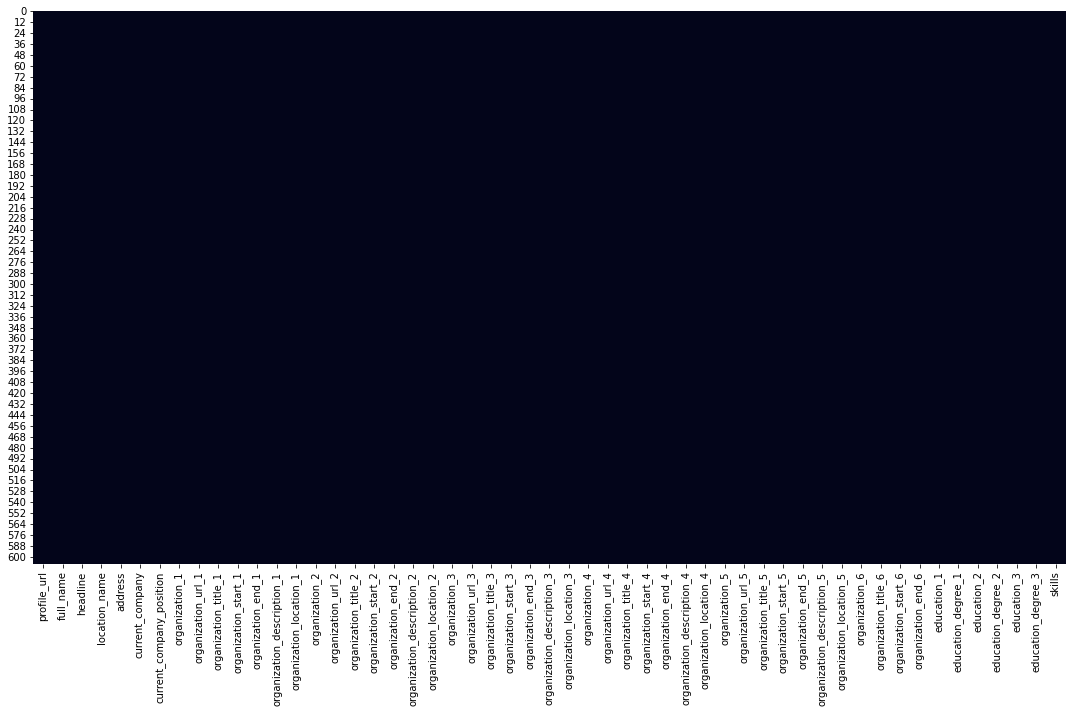

In [121]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isna(),cbar=False)

In [122]:
!pip install xlsxwriter

In [123]:
#df.to_excel("../data.xlsx", engine='xlsxwriter',index = False)
df.to_csv("../data.csv")

### Preparing data for content based recommandation system model

I wanted my data to be ready for a content based recommendation model and content based recommendation models need information about items or users to find similarity. So my first approach consisted of using the headline section to find similar internship listings. For this, I would have to convert the 'headline' section for each internship profile, using bag of words from NLP, into vectors. I would then get a matrix where the rows would consist of internship profiles and the columns would be different words. The values in this matrix would be the number of times each word appears in details section of each internship profile. This would be called a user-item matrix. This way, if we multiplied this matrix with its transpose, we would get to know how similar two internship profiles are

We have decided to use the following features for creating filters in the app:

-skills

-headline


Tokenize : Tokenizing here means splitting a sentence into words. Running the above step ensures that tokenizing won’t return ‘.’ or number as words. Thus, we will have only English words as tokens.
strip() method on the tokens will remove any extra trailing or leading space. This way wherever, for example, ‘internship’ appears in the text it won’t appear as ‘internship ’ or ‘ internship’ 

In [124]:
def tokenize(sentences):
    '''
    tokenizes a bunch of sentences after normalizing them and returns stemmed tokens.
    
    INPUT:
    sentences - a paragraph that need to be tokenized
    
    OUTPUT:
    tokens - list of stemmed tokens
    
    '''
    # normalizing, tokenizing, lemmatizing 
    sentences = re.sub('\W',' ',sentences) 
    sentences = re.sub('[0-9]',' ',sentences)

    tokens = word_tokenize(sentences)
    tokens = [i.strip() for i in tokens]
    
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(i) for i in tokens]
    return tokens

### Tfidf

In [125]:
def similarity_matrix(df):
    '''
    returns a similarity matrix, in the form of a dataframe, between different persons by using the 
    headline section of df.
    
    INPUT:
    df - dataframe with 'd' as one of the columns
    
    OUTPUT:
    sim - similarity matrix(dataframe) with perosn fullname  
    
    '''
    headline = df['headline']
    vect = CountVectorizer(tokenizer= tokenize, stop_words = 'english')
    tfidf = TfidfTransformer()
    
    mat = tfidf.fit_transform(vect.fit_transform(headline).toarray()).toarray()
    sim = np.dot(mat, mat.T)
    sim = pd.DataFrame(sim, columns=df.full_name)
    return sim

In [126]:
sim = similarity_matrix(df)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  % sorted(

In [127]:
sim.to_csv('../recommendation_matrix.csv', index = True)

## CountVectorizer

In [128]:
def similarity_matrix_wo_tfidf(df):
    '''
    returns a similarity matrix, in the form of a dataframe, between different persons by using the 
    headline section
    
    INPUT:
    df - dataframe with 'headline' as one of the columns
    
    OUTPUT:
    sim - similarity matrix(dataframe) with person fullname 
    
    '''
    headline = df['headline']
    vect = CountVectorizer(tokenizer= tokenize, stop_words = 'english')
    
    mat = vect.fit_transform(headline).toarray()
    sim = np.dot(mat, mat.T)
    sim = pd.DataFrame(sim, columns=df.full_name)
    return sim

In [129]:
sim_1 = similarity_matrix_wo_tfidf(df)
sim_1.to_csv('../recommendation_matrix_wo_tfidf.csv', index = True)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  % sorted(

## lemmatizing word
lemmatizing is the process of grouping together the inflected forms of a word so they can be analysed as a single item

In [130]:
def tokenize_lem(sentences):
    '''
    tokenizes a bunch of sentences after normalizing it and returns lemmatized tokens.
    
    INPUT:
    sentences - a paragraph that needs to be tokenized
    
    OUTPUT:
    tokens - list of lemmatized tokens
    
    '''
    # normalizing, tokenizing, lemmatizing 
    sentences = re.sub('\W',' ',sentences) 
    sentences = re.sub('[0-9]',' ',sentences)

    tokens = word_tokenize(sentences)
    tokens = [i.strip() for i in tokens]
    
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(i) for i in tokens]
    return tokens

In [131]:
def similarity_matrix_w_lem(df):
    '''
   returns a similarity matrix, in the form of a dataframe, between different persons by using the 
    headline section
    
    INPUT:
    df - dataframe with 'headline' as one of the columns
    
    OUTPUT:
    sim - similarity matrix(dataframe) with person fullname 
    '''
    headline= df['headline']
    vect = CountVectorizer(tokenizer= tokenize_lem, stop_words = 'english')
    tfidf = TfidfTransformer()
    
    mat = tfidf.fit_transform(vect.fit_transform(headline).toarray()).toarray()
    sim = np.dot(mat, mat.T)
    sim = pd.DataFrame(sim, columns=df.full_name)
    return sim

In [132]:
sim_2 = similarity_matrix_w_lem(df)
sim_2.to_csv('../recommendation_matrix_w_lem.csv', index = True)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


## Use lemmatization without tfidf

In [133]:
def similarity_matrix_w_lem_wo_tfidf(df):
    '''
   returns a similarity matrix, in the form of a dataframe, between different persons by using the 
    headline section
    
    INPUT:
    df - dataframe with 'headline' as one of the columns
    
    OUTPUT:
    sim - similarity matrix(dataframe) with person fullname 
    '''
    headline = df['headline']
    vect = CountVectorizer(tokenizer= tokenize_lem, stop_words = 'english')
    tfidf = TfidfTransformer()
    
    mat = vect.fit_transform(headline).toarray()
    sim = np.dot(mat, mat.T)
    sim = pd.DataFrame(sim, columns=df.full_name)
    return sim

In [134]:
sim_3 = similarity_matrix_w_lem_wo_tfidf(df)
sim_3.to_csv('../recommendation_matrix_w_lem_wo_tfidf.csv', index = True)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


After forming these 3 with the headline section, we try an alternate approach and try to use the 'skills' column to form the similarity matrix. Thus, in the make_recs notebook, we will try using this too and compare it with the results of the above 3.

In [135]:
def similarity_matrix_skills(df):
    '''
    returns a similarity matrix, in the form of a dataframe, between different persons by using the 
    skills section
    
    INPUT:
    df - dataframe with 'skills' as one of the columns
    
    OUTPUT:
    sim - similarity matrix(dataframe) with full_name 
    '''
    skills = df['skills']
    vect = CountVectorizer(tokenizer= tokenize, stop_words = 'english')
    tfidf = TfidfTransformer()
    
    mat = vect.fit_transform(skills).toarray()
    sim = np.dot(mat, mat.T)
    sim = pd.DataFrame(sim, columns=df.full_name)
    return sim

In [136]:
sim_skills=similarity_matrix_skills(df)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  % sorted(

In [137]:
sim_skills.to_csv('../recommendation_df_skills.csv', index = True)